In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

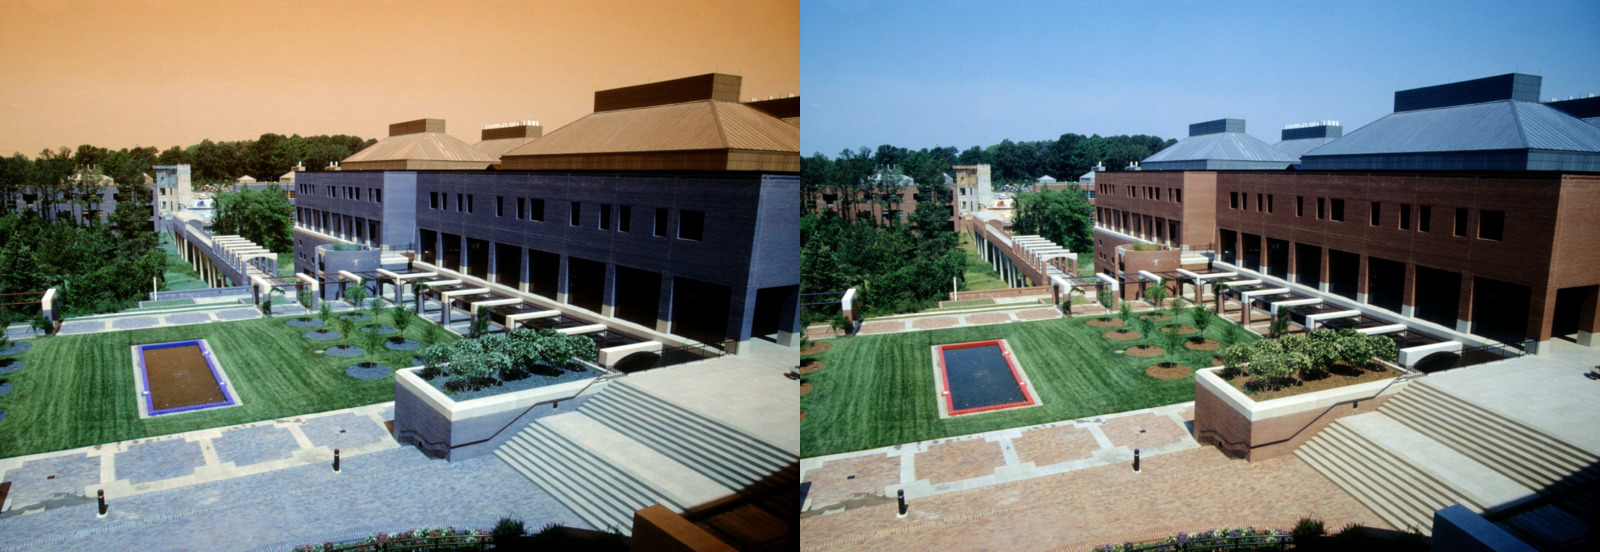

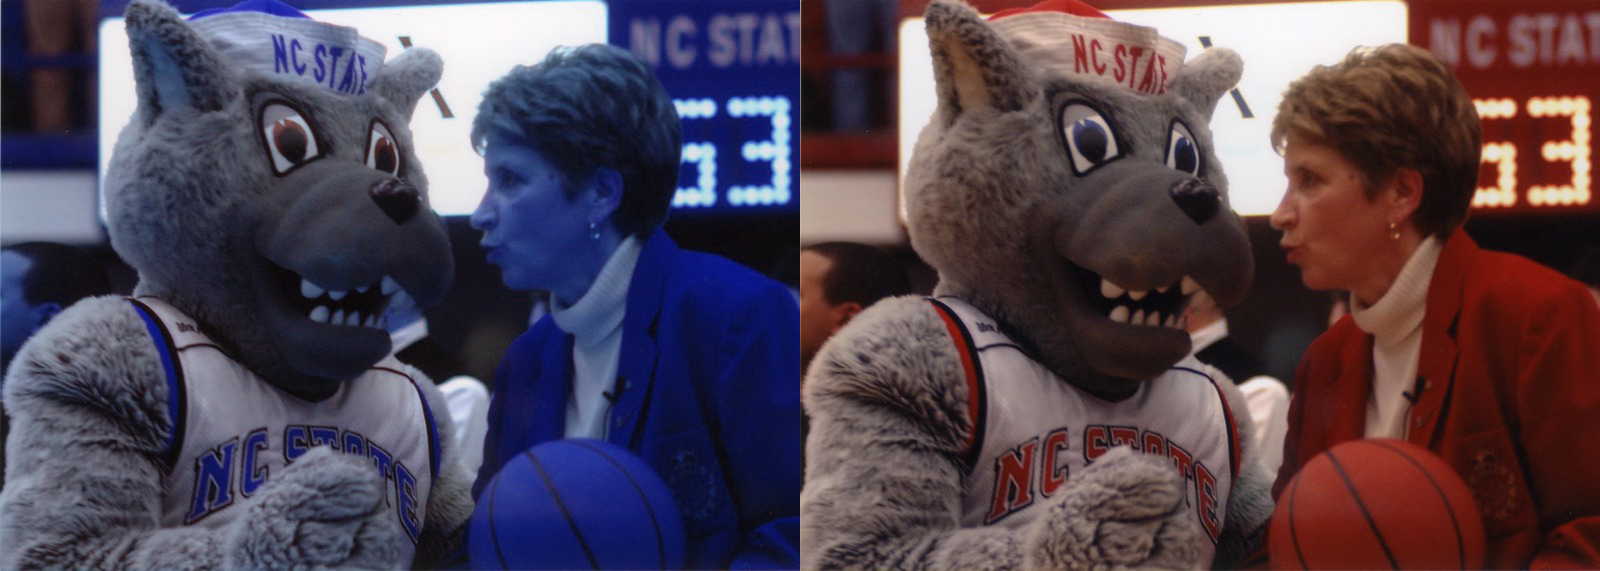

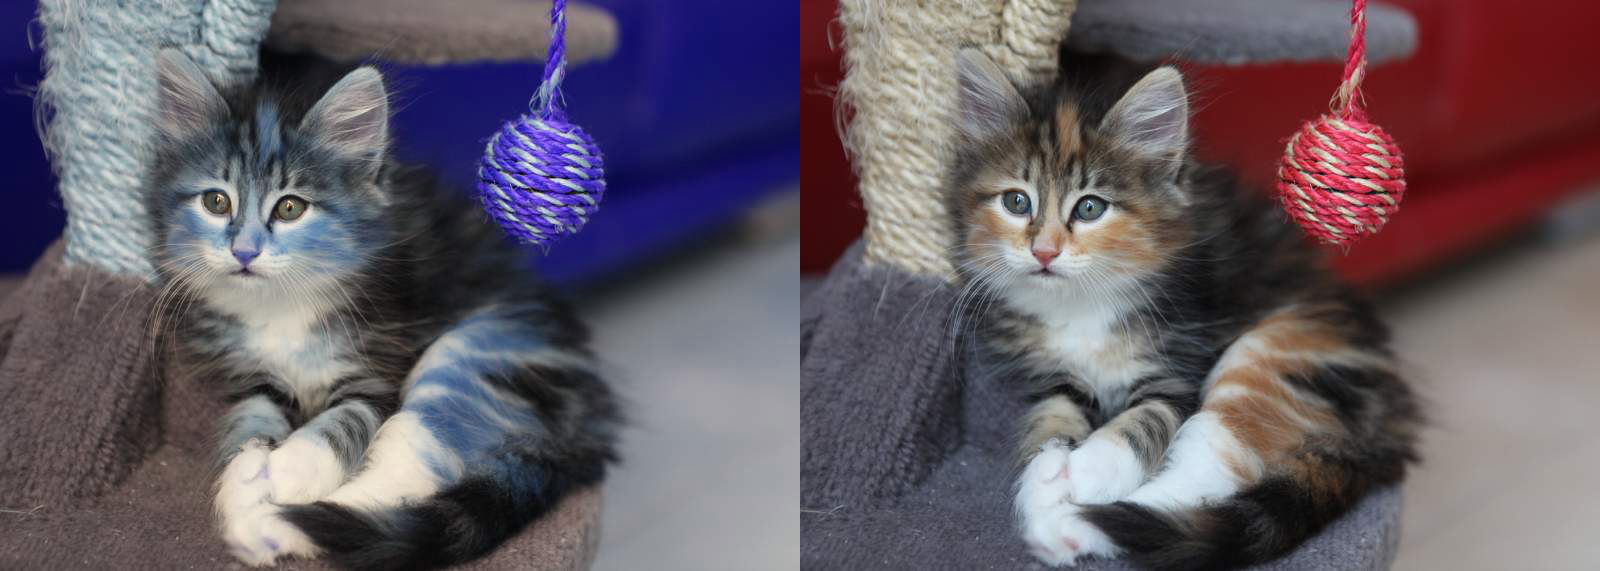

In [ ]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


In [ ]:
import cv2
#Finding Image Details
rose=cv2.imread('rose.jpg')

print("Image Properties")
print("- Number of Pixels: " + str(rose.size))
print("- Shape/Dimensions: " + str(rose.shape))



Image Properties
- Number of Pixels: 3000000
- Shape/Dimensions: (1000, 1000, 3)


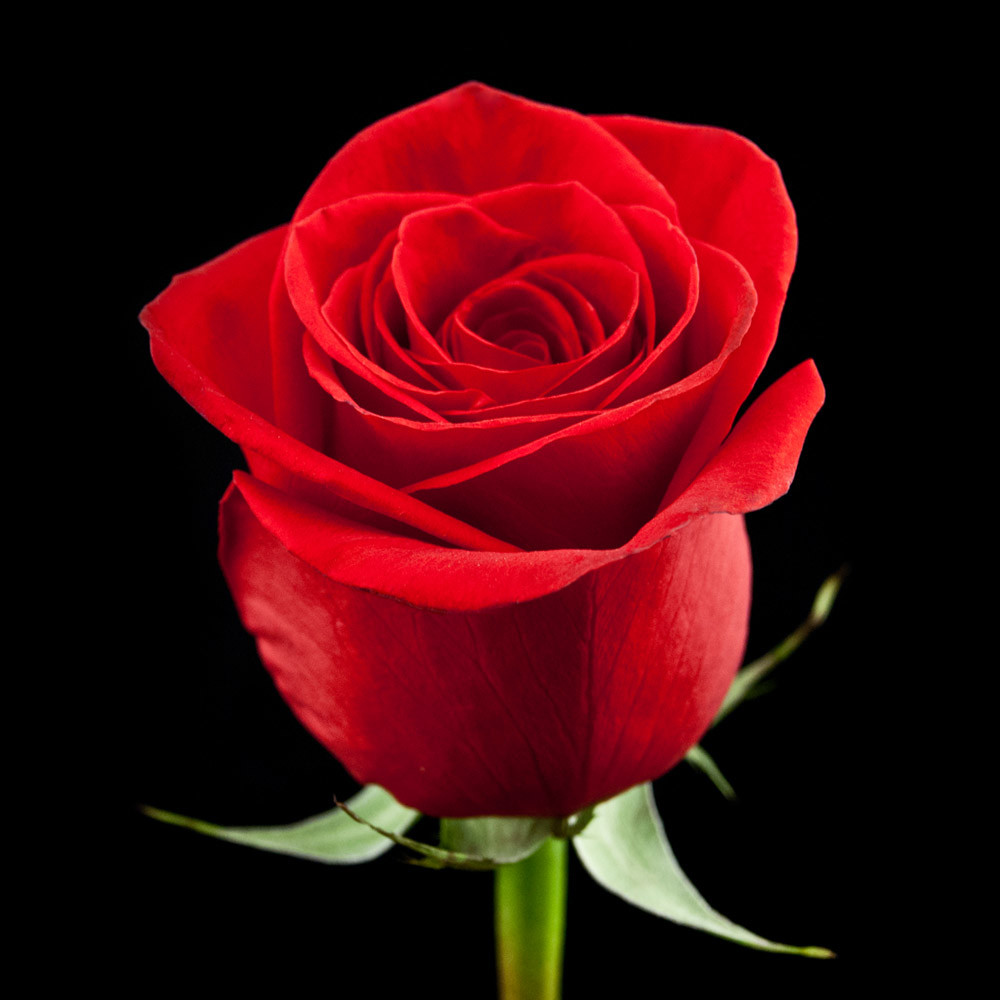

In [ ]:
cv2_imshow(rose)

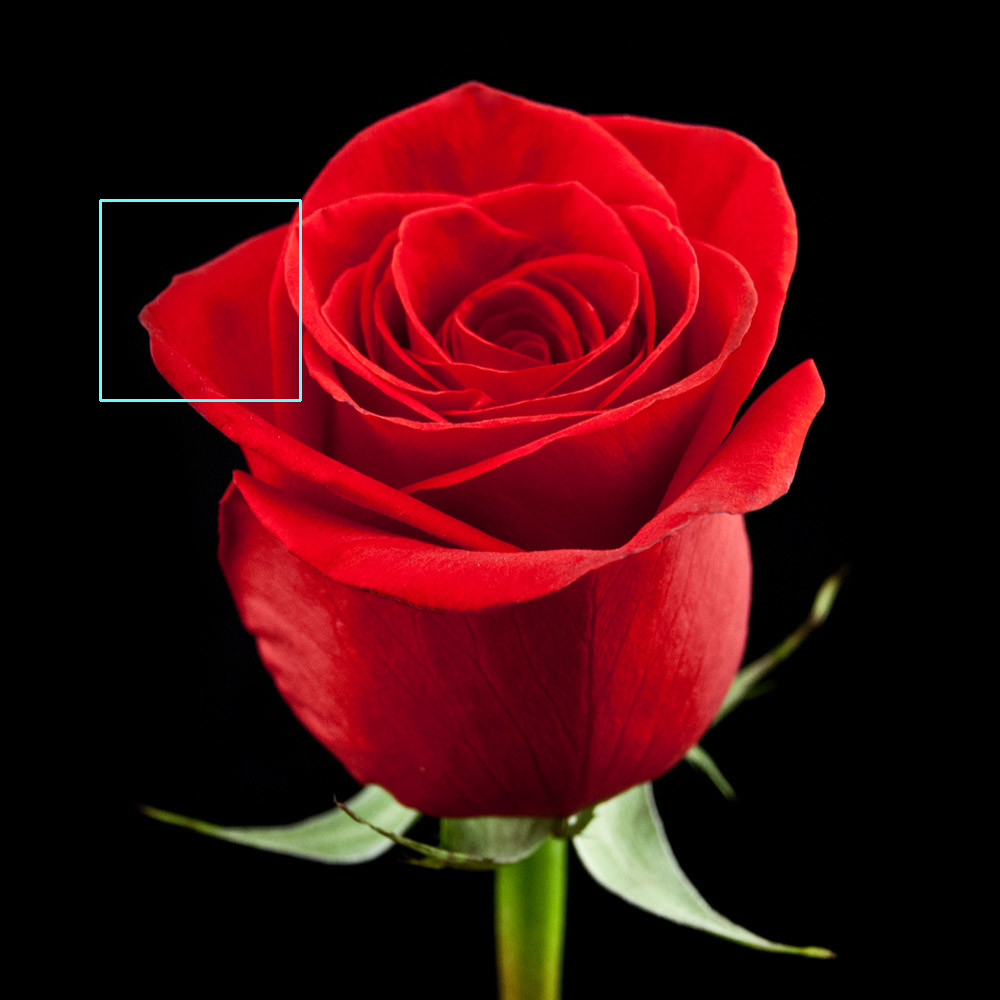

In [ ]:

cv2.rectangle(rose,(100,200),(300,400),(255,255,100),2)
cv2_imshow(rose)

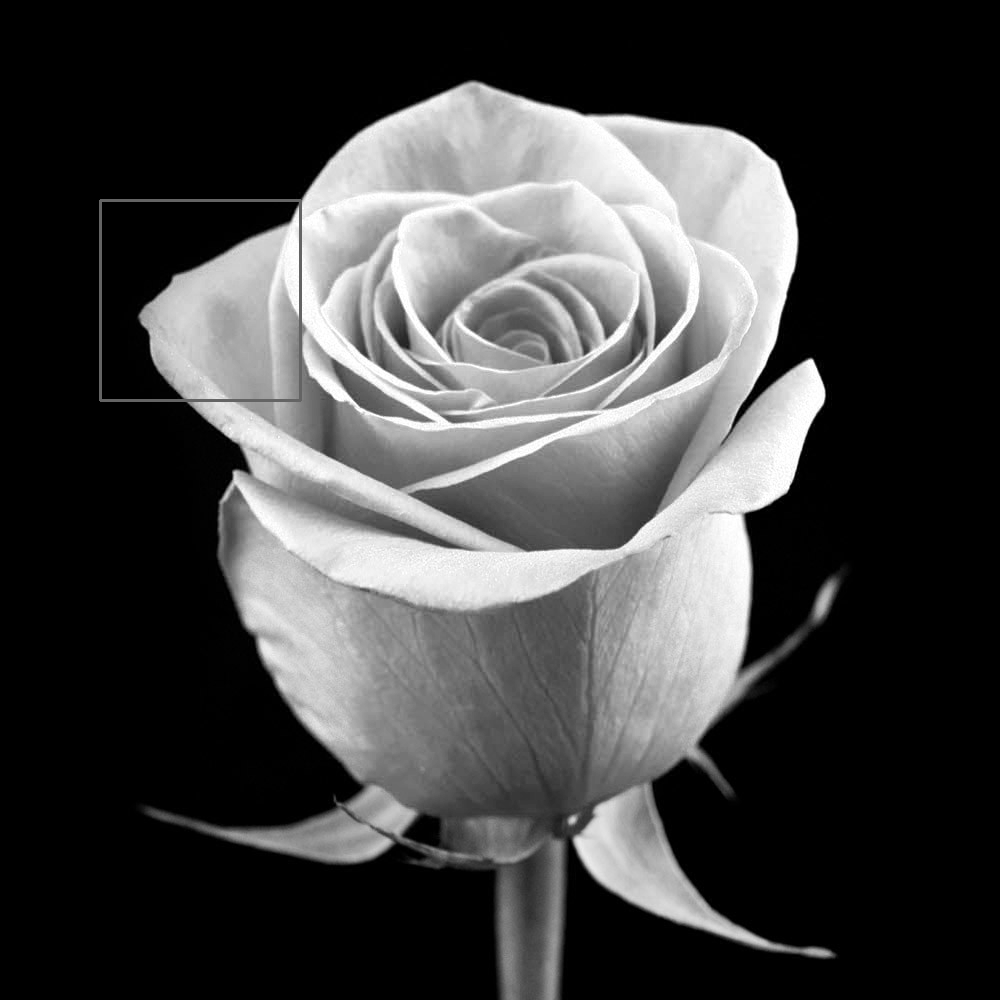

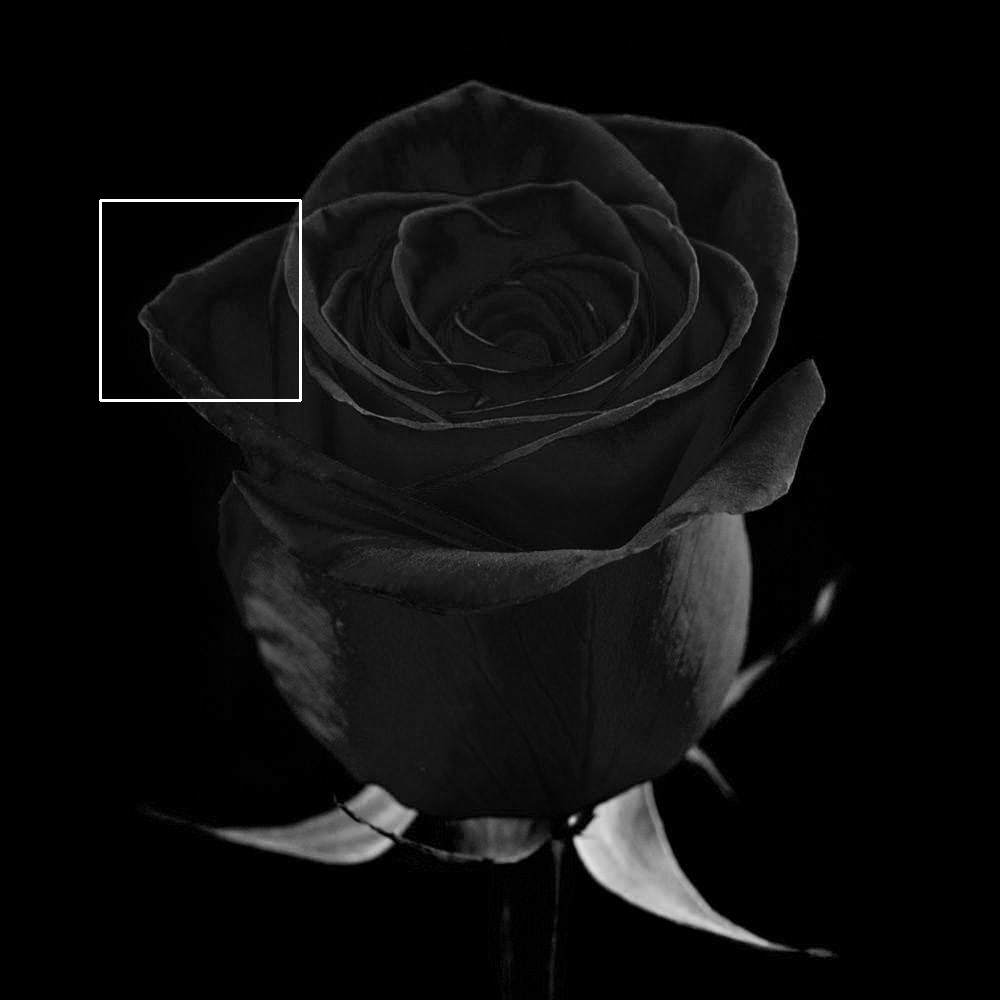

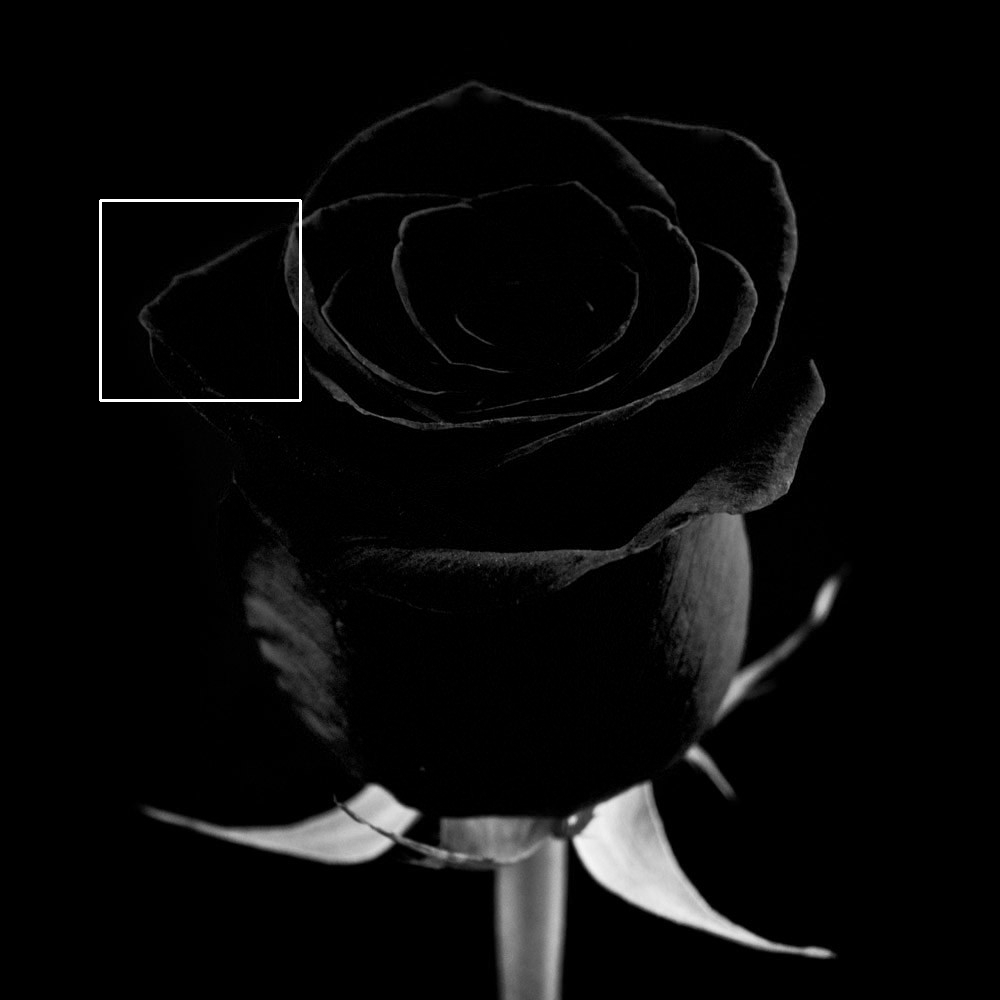

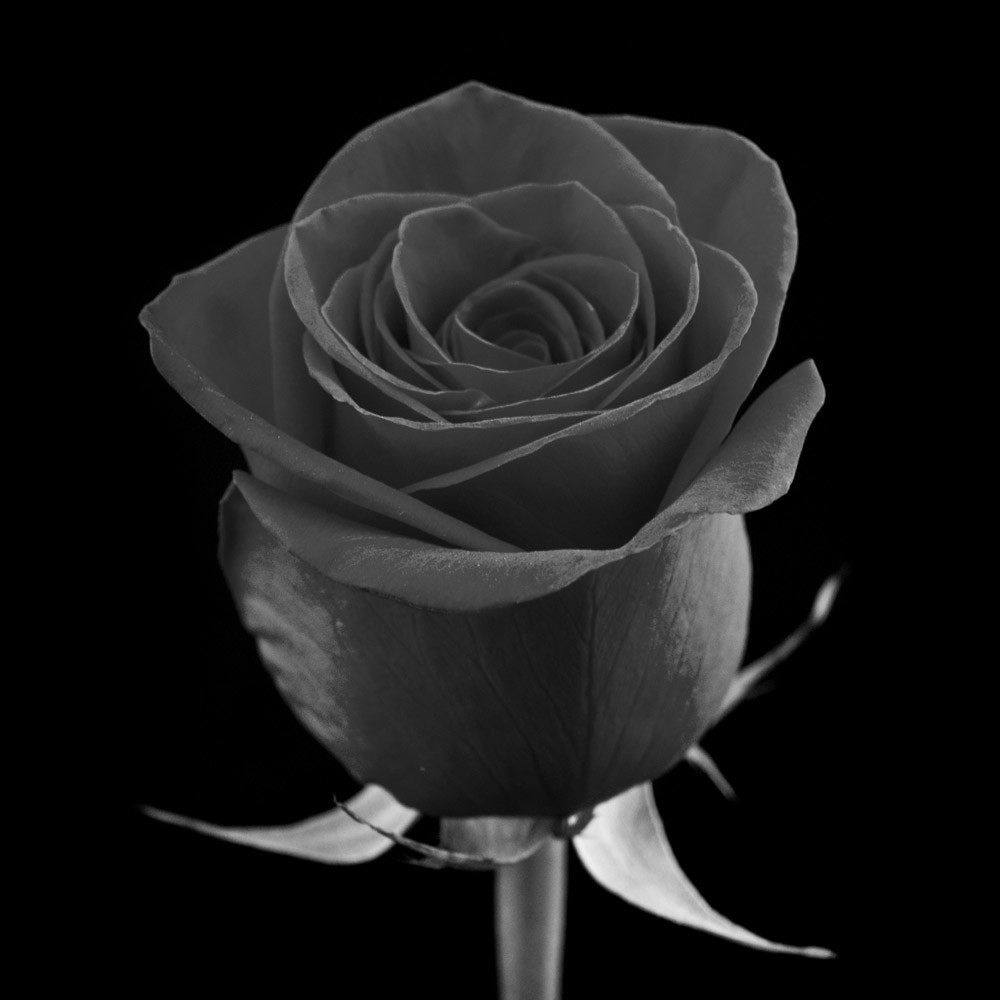

In [ ]:
#Splitting an Image into Individual Channels

from google.colab.patches import cv2_imshow

blue, green, red = cv2.split(rose) # Split the image into its channels
img_gs = cv2.imread('rose.jpg', cv2.IMREAD_GRAYSCALE) # Convert image to grayscale

cv2_imshow(red) # Display the red channel in the image
cv2_imshow(blue) # Display the red channel in the image
cv2_imshow(green) # Display the red channel in the image
cv2_imshow(img_gs) # Display the grayscale version of image

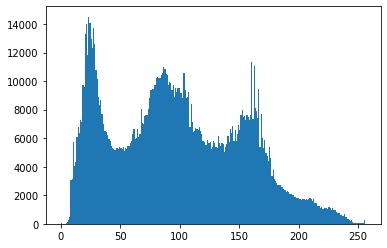

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

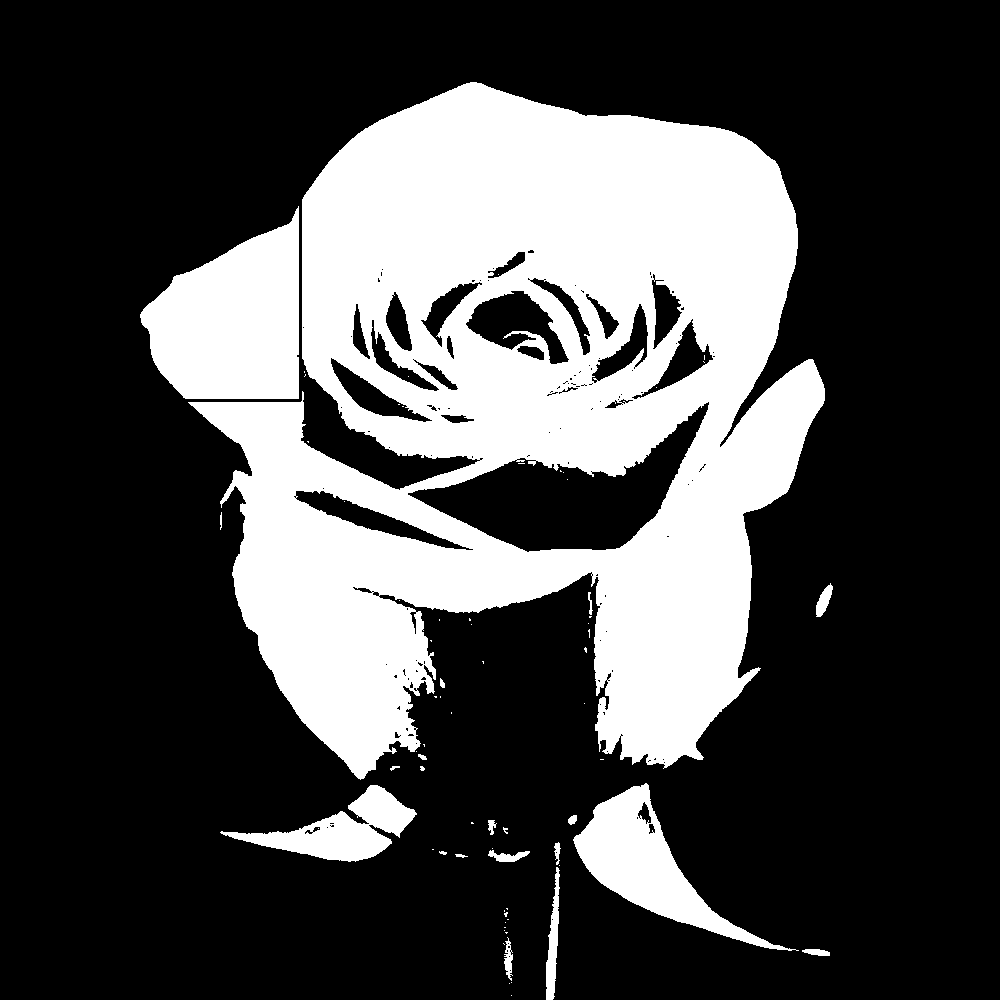

In [ ]:



# Perform binary thresholding on the image with T = 125
r, threshold = cv2.threshold(red, 125, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

In [ ]:
# Perform binary thresholding on the image with T = 125
r, threshold = cv2.threshold(red, 125, 255, cv2.THRESH_)
cv2_imshow(threshold)

AttributeError: ignored

In [ ]:
th2 = cv2.adaptiveThreshold(red,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(red,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

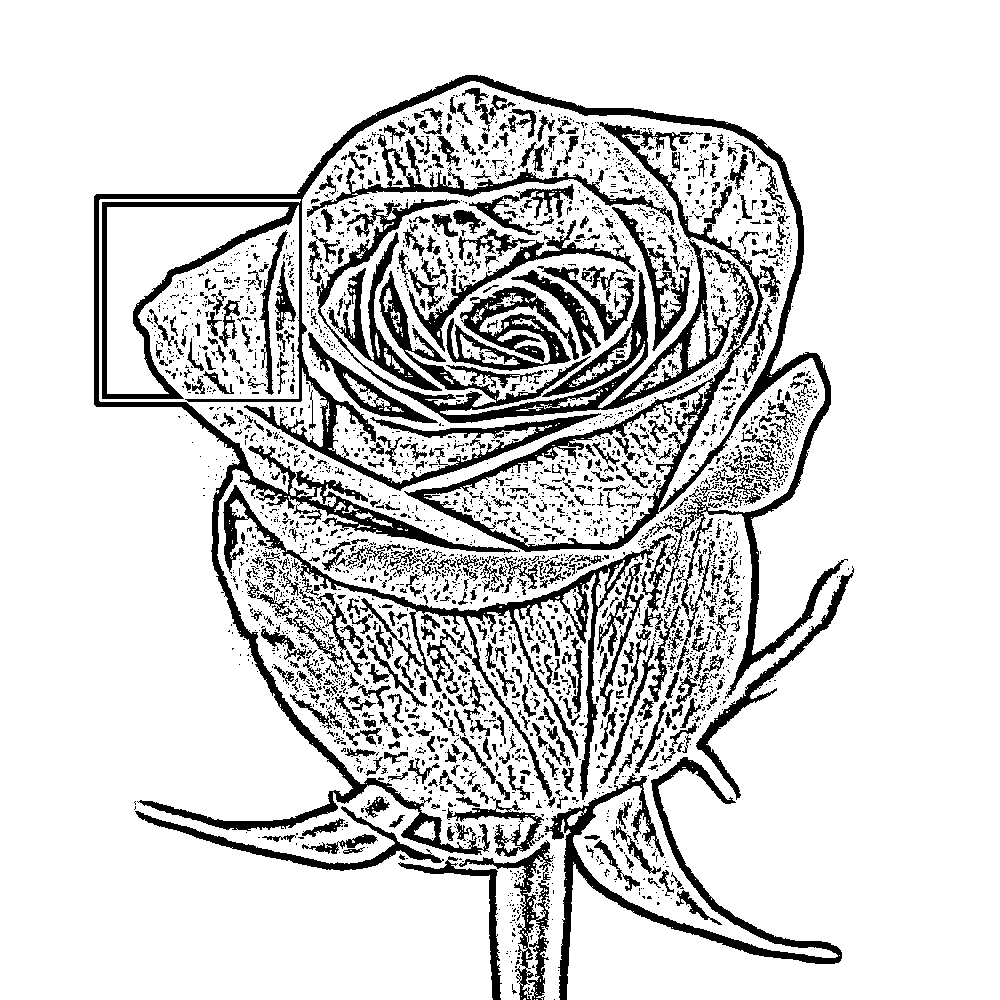

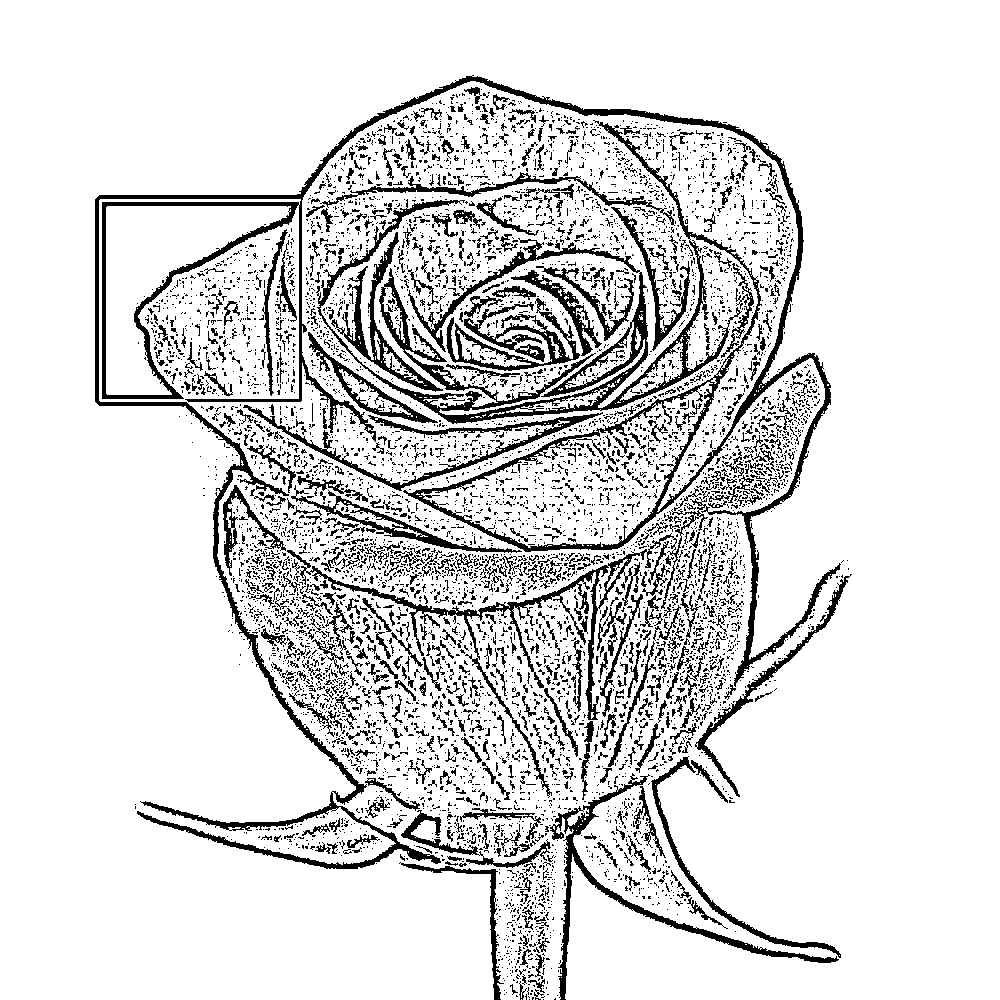

In [ ]:
cv2_imshow(th2)
cv2_imshow(th3)

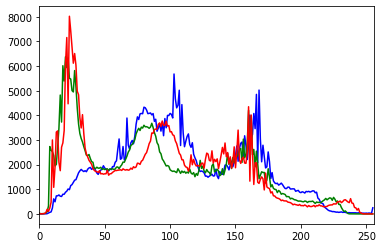

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

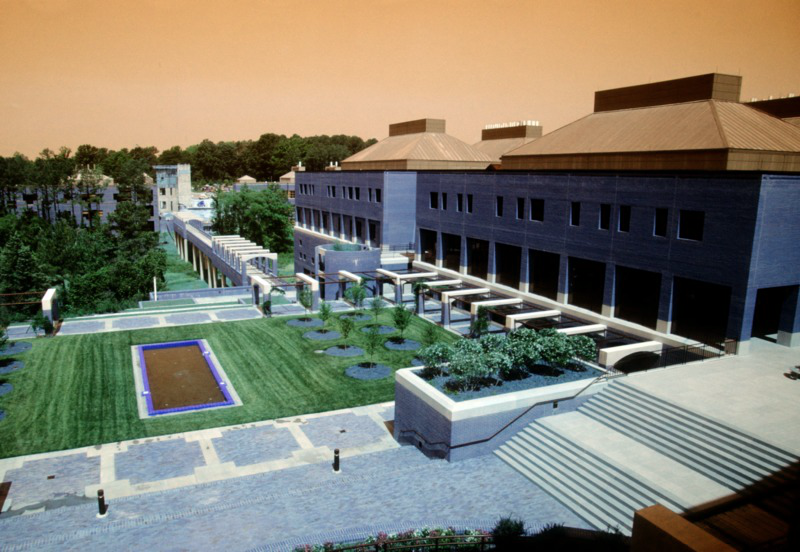

In [ ]:
campus = io.imread(urls[0])
cv2_imshow(campus)

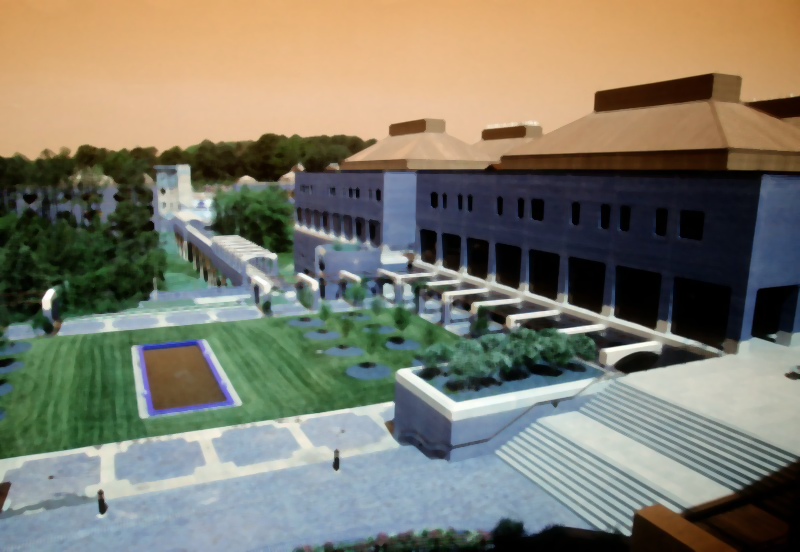

In [ ]:
blur_image = cv2.medianBlur(campus,5)
cv2_imshow(blur_image)

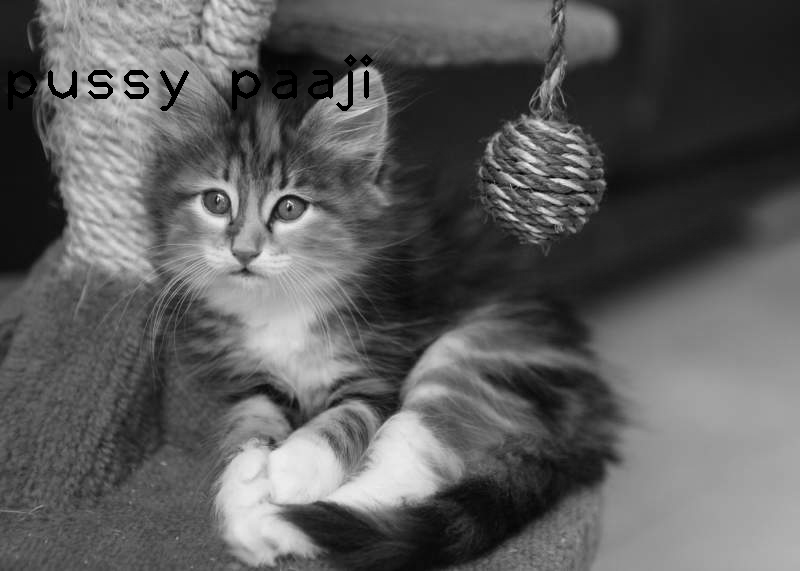

In [ ]:
name="pussy paaji"
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.putText(gray_image,name,(2,100),cv.FONT_HERSHEY_PLAIN,4, (0,0,0),3)
cv2_imshow(gray_image)

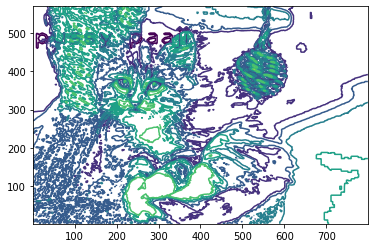

In [ ]:
plt.contour(gray_image, origin = "image")

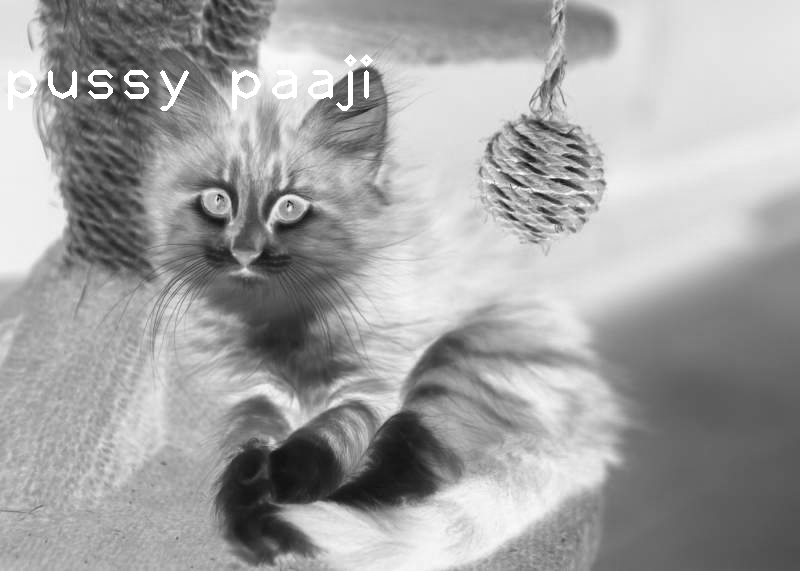

In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

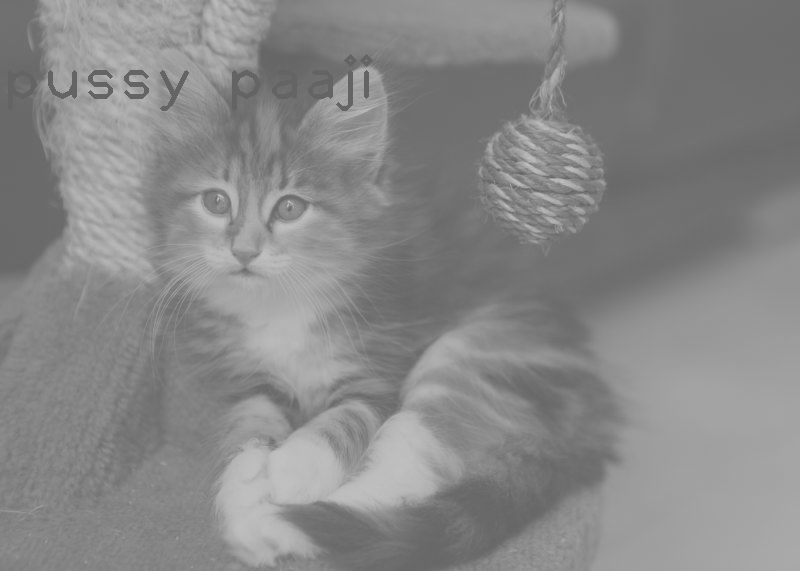

In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

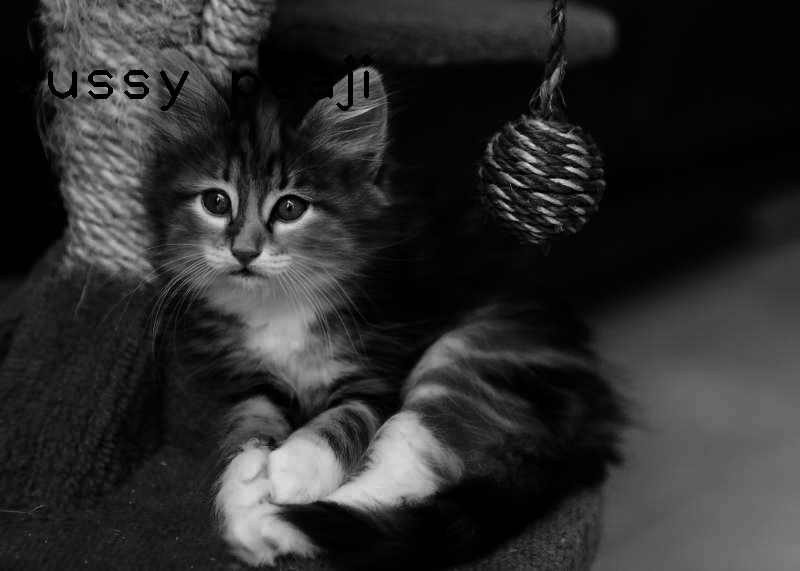

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

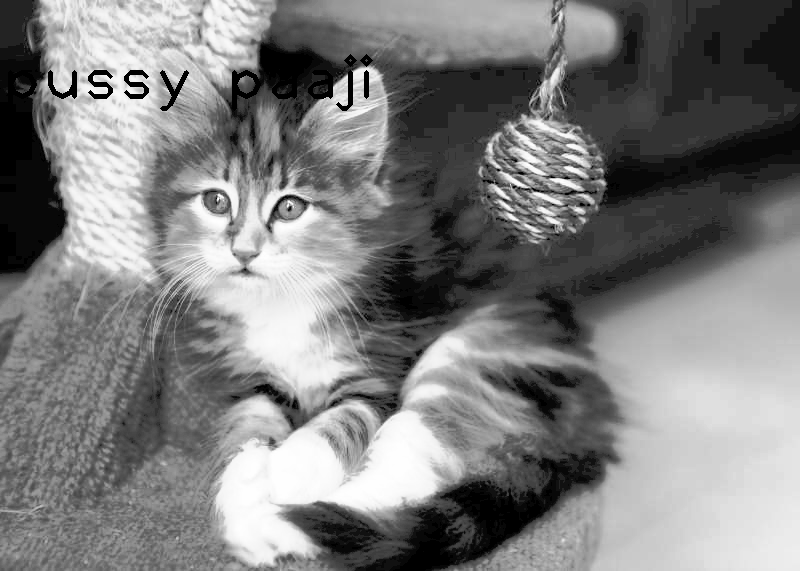

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

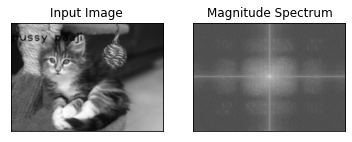

In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

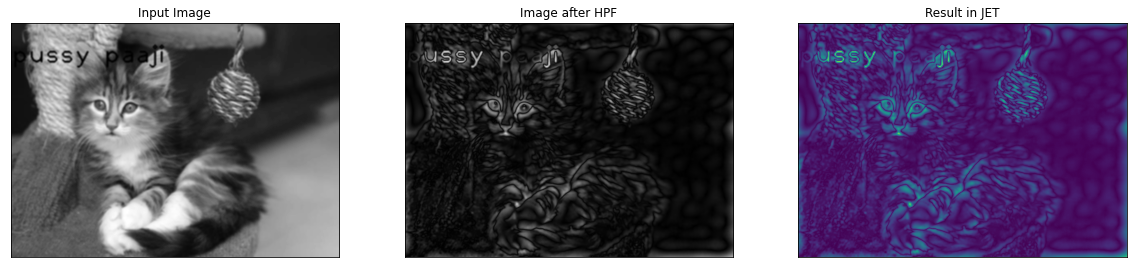

In [ ]:
#Highpass Filtering in FFT
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(113),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()